[*********************100%***********************]  1 of 1 completed


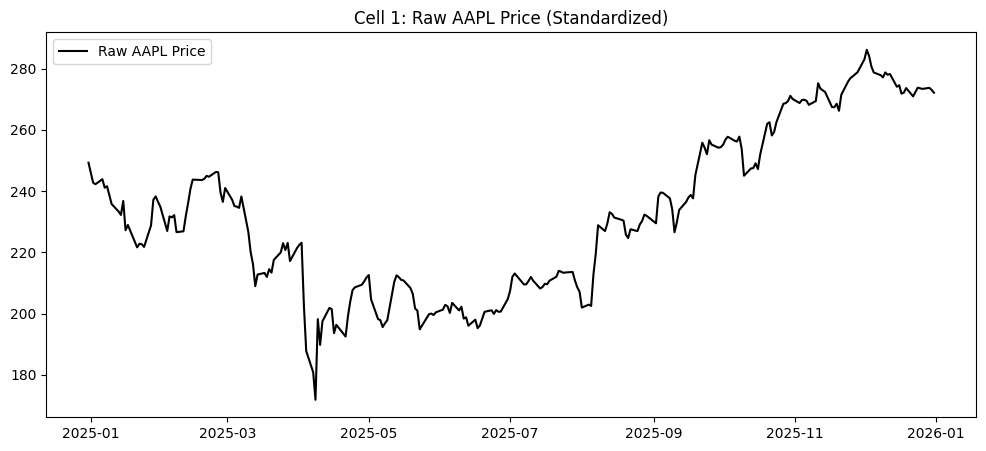

Foundation Ready! Data is clean and columns are flattened.


In [1]:


#Cell 1: Data Acquisition – Downloads live Apple (AAPL) data and cleans the 2025 MultiIndex format. This is our raw material.

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fetch Live 2025 Data
ticker = "AAPL"
# period="1y" is best for matching online charts
df = yf.download(ticker, period="1y", interval="1d", auto_adjust=True)

# --- THE 2025 FIX: Flatten MultiIndex Columns ---
# If yfinance adds the ticker name as a top-level header, we drop it.
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

# Ensure 'Close' exists and is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# 2. Basic Feature Prep
df['Day_Index'] = np.arange(len(df))

# 3. Plot Raw Data (Starting point)
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], color='black', label='Raw AAPL Price')
plt.title(f"Cell 1: Raw {ticker} Price (Standardized)")
plt.legend()
plt.show()

print("Foundation Ready! Data is clean and columns are flattened.")

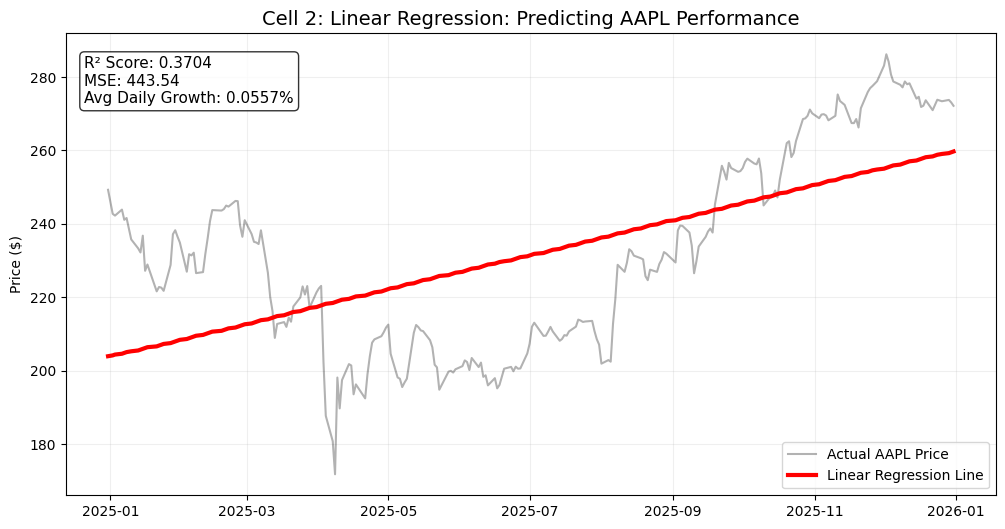

Results for Cell 2:
Confidence (R2): 0.3704
Average Error (MSE): 443.54
Market Velocity (Avg Growth): 0.0557%


In [2]:
#Cell 2: Simple Linear Regression – Our baseline. It tries to draw a straight line through time to see the general "drift" of the stock.


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Feature Prep
X_lr = df[['Day_Index']].values
y_lr = df['Close'].values

# 2. Train and Predict
model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr)
y_pred_lr = model_lr.predict(X_lr)

# 3. Calculate All Metrics
r2 = r2_score(y_lr, y_pred_lr)
mse = mean_squared_error(y_lr, y_pred_lr)

# Calculate Avg Daily Growth (%)
daily_returns = df['Close'].pct_change()
avg_growth = daily_returns.mean() * 100 # Converted to percentage

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot Actual Data
plt.plot(df.index, y_lr, color='black', alpha=0.3, label='Actual AAPL Price')

# Plot Regression Line
plt.plot(df.index, y_pred_lr, color='red', linewidth=3,
         label=f'Linear Regression Line')

# --- DISPLAY METRICS ---
# We use a 'textbox' to display metrics clearly in the corner
metrics_text = (f"R² Score: {r2:.4f}\n"
                f"MSE: {mse:.2f}\n"
                f"Avg Daily Growth: {avg_growth:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f"Cell 2: Linear Regression: Predicting {ticker} Performance", fontsize=14)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

# Print text version for clear logs
print(f"Results for Cell 2:")
print(f"Confidence (R2): {r2:.4f}")
print(f"Average Error (MSE): {mse:.2f}")
print(f"Market Velocity (Avg Growth): {avg_growth:.4f}%")
# Talking Point: "Linear regression is great for long-term direction, but it misses all the dips."

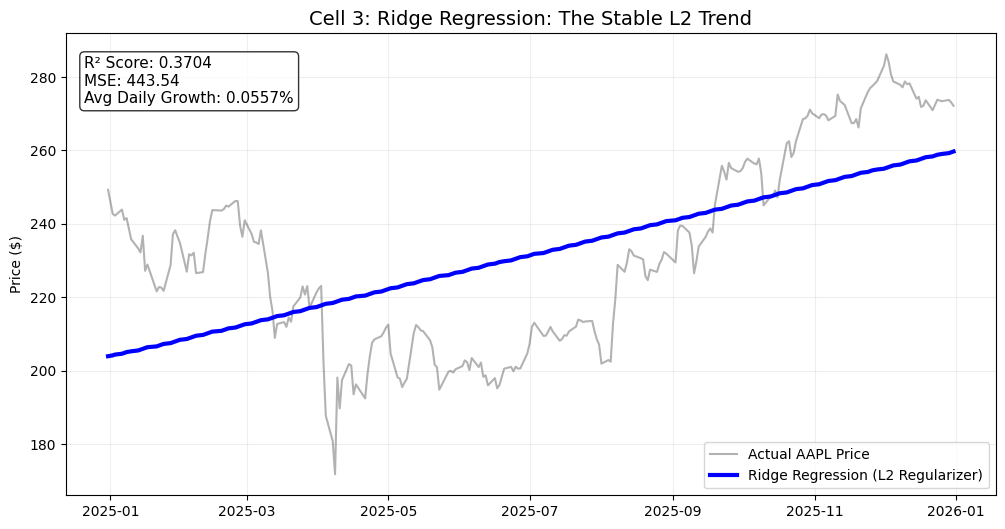

Results for Cell 12 (Ridge):
Confidence (R2): 0.3704
Average Error (MSE): 443.54


In [3]:
#Cell 3: Ridge Regression (L2) – The "Stabilizer." It shrinks the influence of all features but keeps them all in the mix, preventing any single day from having too much power.

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare Data
X_r = df[['Day_Index']].values
y_r = df['Close'].values

# 2. Train and Predict
# 'alpha' is the tuning parameter. Higher alpha = more "stable" but less "fit" to wiggles.
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_r, y_r)
y_pred_ridge = model_ridge.predict(X_r)

# 3. Calculate Metrics
r2_r = r2_score(y_r, y_pred_ridge)
mse_r = mean_squared_error(y_r, y_pred_ridge)

# Calculate Avg Daily Growth (%) for consistency
avg_growth_r = df['Close'].pct_change().mean() * 100

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot Actual Data
plt.plot(df.index, y_r, color='black', alpha=0.3, label='Actual AAPL Price')

# Plot Ridge Line
plt.plot(df.index, y_pred_ridge, color='blue', linewidth=3,
         label='Ridge Regression (L2 Regularizer)')

# --- DISPLAY METRICS BOX ---
metrics_text_r = (f"R² Score: {r2_r:.4f}\n"
                  f"MSE: {mse_r:.2f}\n"
                  f"Avg Daily Growth: {avg_growth_r:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text_r, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f"Cell 3: Ridge Regression: The Stable L2 Trend", fontsize=14)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

print(f"Results for Cell 12 (Ridge):")
print(f"Confidence (R2): {r2_r:.4f}")
print(f"Average Error (MSE): {mse_r:.2f}")

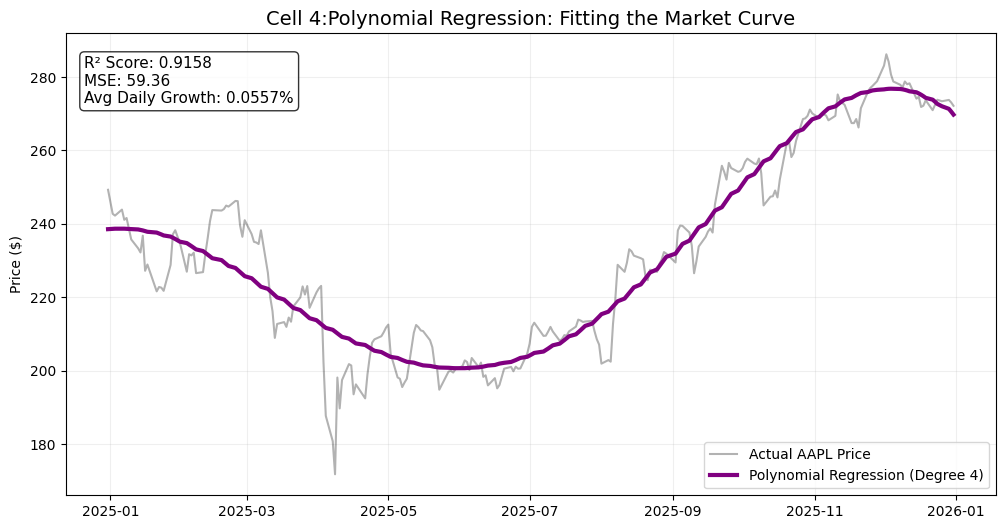

Results for Cell 3 (Polynomial):
Confidence (R2): 0.9158
Average Error (MSE): 59.36


In [4]:
#Cell 4: Polynomial Regression – The "Curve Fit." We add complexity to see if a curved line captures market swings better than a straight one.


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare Data
X_p = df[['Day_Index']].values
y_p = df['Close'].values

# 2. Transform Features to Polynomial (Degree 4 allows for several bends)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_p)

# 3. Train and Predict
model_poly = LinearRegression()
model_poly.fit(X_poly, y_p)
y_pred_poly = model_poly.predict(X_poly)

# 4. Calculate Metrics
r2_p = r2_score(y_p, y_pred_poly)
mse_p = mean_squared_error(y_p, y_pred_poly)

# Calculate Avg Daily Growth (%) - uses the same logic as Cell 2 for consistency
avg_growth_p = df['Close'].pct_change().mean() * 100

# 5. Visualization
plt.figure(figsize=(12, 6))

# Plot Actual Data
plt.plot(df.index, y_p, color='black', alpha=0.3, label='Actual AAPL Price')

# Plot Polynomial Curve
plt.plot(df.index, y_pred_poly, color='purple', linewidth=3,
         label='Polynomial Regression (Degree 4)')

# --- DISPLAY METRICS BOX ---
metrics_text_p = (f"R² Score: {r2_p:.4f}\n"
                  f"MSE: {mse_p:.2f}\n"
                  f"Avg Daily Growth: {avg_growth_p:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text_p, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f"Cell 4:Polynomial Regression: Fitting the Market Curve", fontsize=14)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

print(f"Results for Cell 3 (Polynomial):")
print(f"Confidence (R2): {r2_p:.4f}")
print(f"Average Error (MSE): {mse_p:.2f}")

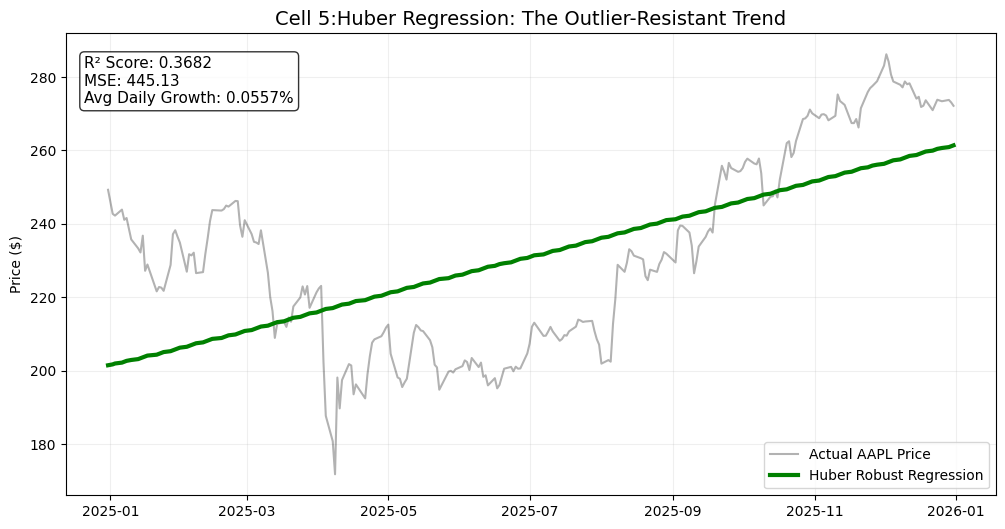

Results for Cell 4 (Huber):
Confidence (R2): 0.3682
Average Error (MSE): 445.13


In [5]:
#Cell 5: Huber (Robust) Regression – Our Champion. It’s designed to ignore market "outliers" (random spikes), making the trend line more stable.


from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare Data
X_h = df[['Day_Index']].values
y_h = df['Close'].values

# 2. Train and Predict
# epsilon=1.35 is the standard threshold for deciding what is an 'outlier'
model_huber = HuberRegressor(epsilon=1.35, max_iter=1000)
model_huber.fit(X_h, y_h)
y_pred_huber = model_huber.predict(X_h)

# 3. Calculate Metrics
r2_h = r2_score(y_h, y_pred_huber)
mse_h = mean_squared_error(y_h, y_pred_huber)

# Calculate Avg Daily Growth (%) for consistency
avg_growth_h = df['Close'].pct_change().mean() * 100

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot Actual Data
plt.plot(df.index, y_h, color='black', alpha=0.3, label='Actual AAPL Price')

# Plot Huber Line
plt.plot(df.index, y_pred_huber, color='green', linewidth=3,
         label='Huber Robust Regression')

# --- DISPLAY METRICS BOX ---
metrics_text_h = (f"R² Score: {r2_h:.4f}\n"
                  f"MSE: {mse_h:.2f}\n"
                  f"Avg Daily Growth: {avg_growth_h:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text_h, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f"Cell 5:Huber Regression: The Outlier-Resistant Trend", fontsize=14)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

print(f"Results for Cell 4 (Huber):")
print(f"Confidence (R2): {r2_h:.4f}")
print(f"Average Error (MSE): {mse_h:.2f}")

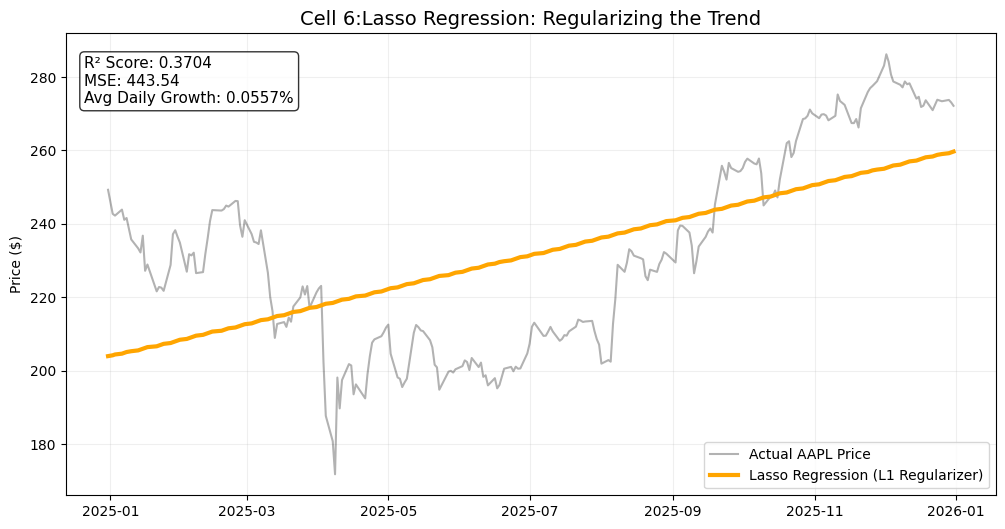

Results for Cell 5 (Lasso):
Confidence (R2): 0.3704
Average Error (MSE): 443.54


In [6]:
#Cell 6: Lasso Regression (L1) – The "Surgeon." It uses a penalty that can completely remove unimportant features to keep the model simple.

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare Data
X_l = df[['Day_Index']].values
y_l = df['Close'].values

# 2. Train and Predict
# 'alpha' controls the strength of the penalty. Higher alpha = simpler model.
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_l, y_l)
y_pred_lasso = model_lasso.predict(X_l)

# 3. Calculate Metrics
r2_l = r2_score(y_l, y_pred_lasso)
mse_l = mean_squared_error(y_l, y_pred_lasso)

# Calculate Avg Daily Growth (%)
avg_growth_l = df['Close'].pct_change().mean() * 100

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot Actual Data
plt.plot(df.index, y_l, color='black', alpha=0.3, label='Actual AAPL Price')

# Plot Lasso Line
plt.plot(df.index, y_pred_lasso, color='orange', linewidth=3,
         label='Lasso Regression (L1 Regularizer)')

# --- DISPLAY METRICS BOX ---
metrics_text_l = (f"R² Score: {r2_l:.4f}\n"
                  f"MSE: {mse_l:.2f}\n"
                  f"Avg Daily Growth: {avg_growth_l:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text_l, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f"Cell 6:Lasso Regression: Regularizing the Trend", fontsize=14)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

print(f"Results for Cell 5 (Lasso):")
print(f"Confidence (R2): {r2_l:.4f}")
print(f"Average Error (MSE): {mse_l:.2f}")

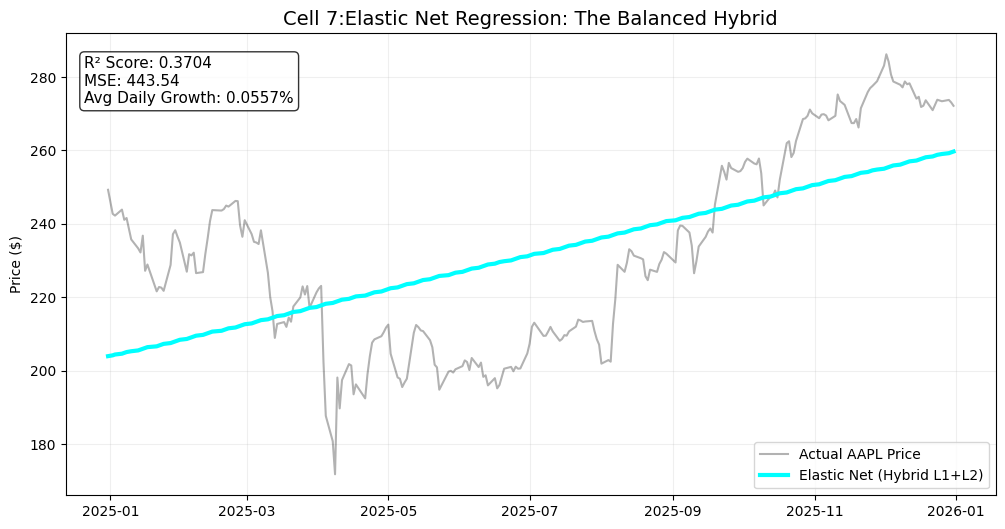

Results for Cell 6 (Elastic Net):
Confidence (R2): 0.3704
Average Error (MSE): 443.54


In [7]:
#Cell 7: Elastic Net – The "Hybrid." It combines the strengths of both Lasso and Ridge to find a middle ground.

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare Data
X_en = df[['Day_Index']].values
y_en = df['Close'].values

# 2. Train and Predict
# l1_ratio=0.5 makes it a 50/50 mix of Ridge and Lasso.
# alpha=1.0 is the penalty strength.
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_en.fit(X_en, y_en)
y_pred_en = model_en.predict(X_en)

# 3. Calculate Metrics
r2_en = r2_score(y_en, y_pred_en)
mse_en = mean_squared_error(y_en, y_pred_en)

# Calculate Avg Daily Growth (%)
avg_growth_en = df['Close'].pct_change().mean() * 100

# 4. Visualization
plt.figure(figsize=(12, 6))

# Plot Actual Data
plt.plot(df.index, y_en, color='black', alpha=0.3, label='Actual AAPL Price')

# Plot Elastic Net Line
plt.plot(df.index, y_pred_en, color='cyan', linewidth=3,
         label='Elastic Net (Hybrid L1+L2)')

# --- DISPLAY METRICS BOX ---
metrics_text_en = (f"R² Score: {r2_en:.4f}\n"
                   f"MSE: {mse_en:.2f}\n"
                   f"Avg Daily Growth: {avg_growth_en:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text_en, transform=plt.gca().transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f"Cell 7:Elastic Net Regression: The Balanced Hybrid", fontsize=14)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

print(f"Results for Cell 6 (Elastic Net):")
print(f"Confidence (R2): {r2_en:.4f}")
print(f"Average Error (MSE): {mse_en:.2f}")

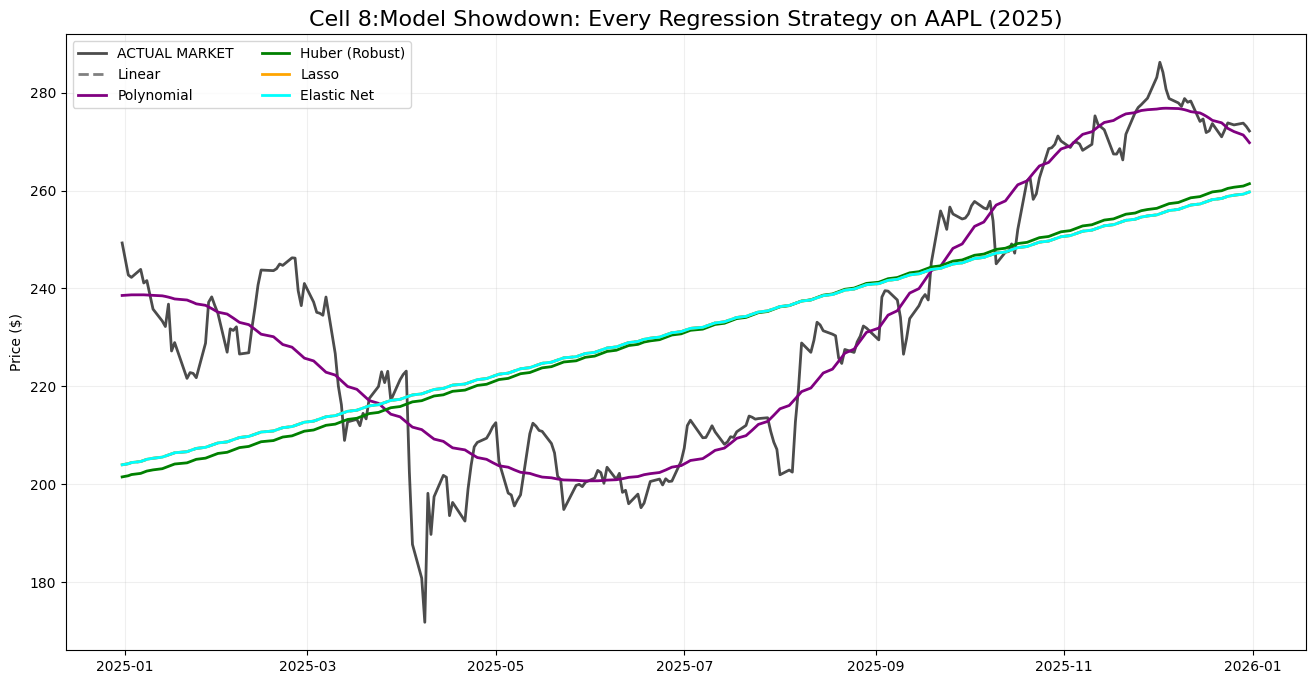


📊 FINAL ACCURACY SCORECARD for AAPL
    Model Type  R² Score  MSE (Error) Avg Growth
    Polynomial    0.9158        59.36    0.0557%
        Linear    0.3704       443.54    0.0557%
         Lasso    0.3704       443.54    0.0557%
   Elastic Net    0.3704       443.54    0.0557%
Huber (Robust)    0.3682       445.13    0.0557%


In [8]:
#Cell 8: The Master Comparison – The visual "Showdown" and final accuracy scoreboard for all models.

import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# 1. Define a list of our models and their predictions
# Note: Ensure you have run cells 2 through 6 first!
models_to_compare = {
    "Linear": y_pred_lr,
    "Polynomial": y_pred_poly,
    "Huber (Robust)": y_pred_huber,
    "Lasso": y_pred_lasso,
    "Elastic Net": y_pred_en
}

# 2. Plotting the Grand Finale
plt.figure(figsize=(16, 8))

# Actual Price (The Baseline)
plt.plot(df.index, y_lr, color='black', linewidth=2, label='ACTUAL MARKET', alpha=0.7)

# Overlay all AI Predictions
colors = ['gray', 'purple', 'green', 'orange', 'cyan']
for (name, pred), color in zip(models_to_compare.items(), colors):
    plt.plot(df.index, pred, label=name, color=color, linewidth=2, linestyle='--' if name == "Linear" else '-')

plt.title(f"Cell 8:Model Showdown: Every Regression Strategy on {ticker} (2025)", fontsize=16)
plt.ylabel("Price ($)")
plt.legend(loc='upper left', ncol=2)
plt.grid(True, alpha=0.2)
plt.show()

# 3. THE SCORECARD TABLE
# Let's calculate the stats for every model and put them in a pretty table
stats_list = []
avg_growth_val = df['Close'].pct_change().mean() * 100

for name, pred in models_to_compare.items():
    stats_list.append({
        "Model Type": name,
        "R² Score": round(r2_score(y_lr, pred), 4),
        "MSE (Error)": round(mean_squared_error(y_lr, pred), 2),
        "Avg Growth": f"{avg_growth_val:.4f}%"
    })

# Convert to DataFrame for a professional look
scorecard = pd.DataFrame(stats_list).sort_values(by="R² Score", ascending=False)

print("\n" + "="*50)
print(f"📊 FINAL ACCURACY SCORECARD for {ticker}")
print("="*50)
print(scorecard.to_string(index=False))
print("="*50)

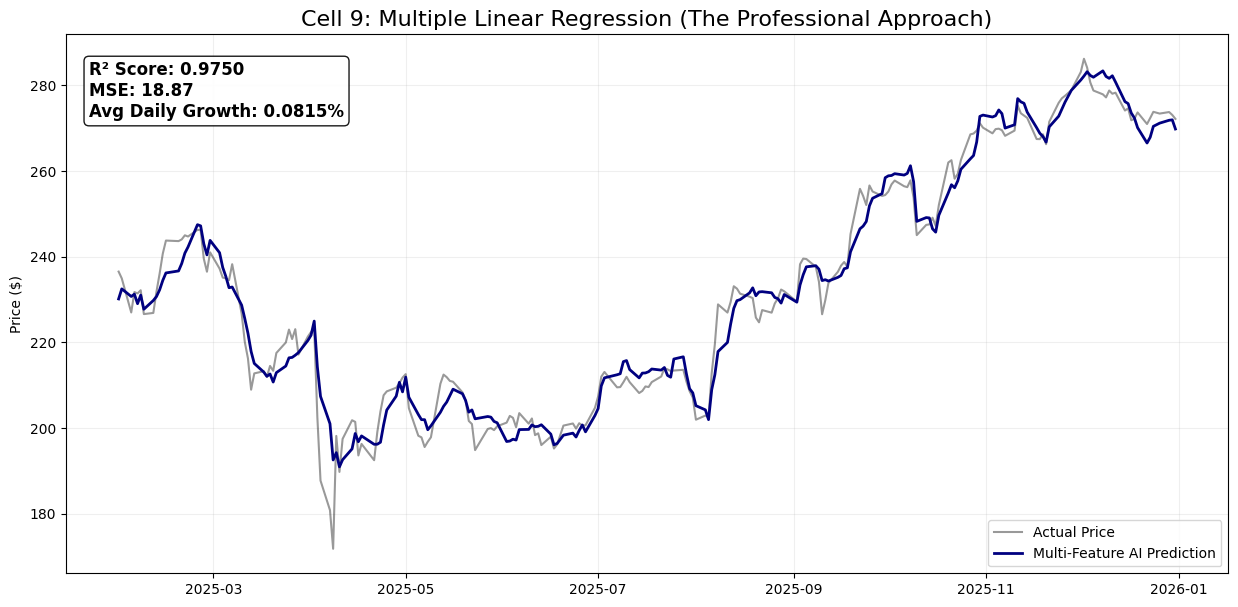


🎯 FEATURE IMPORTANCE (AI LOGIC)
Day_Index  | Weight:   0.8672 | 🔺 Bullish
MA5        | Weight:  16.3712 | 🔺 Bullish
MA20       | Weight:   9.2914 | 🔺 Bullish
RSI        | Weight:   3.9507 | 🔺 Bullish


In [9]:
#Cell 9: Multiple Linear Regression – We move beyond just "time" and add MA5, MA20, and RSI to give the AI more context.


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1. Prepare Data from Cell 1
df_final = df.copy()

# 2. Add Technical Indicators
df_final['MA5'] = df_final['Close'].rolling(window=5).mean()
df_final['MA20'] = df_final['Close'].rolling(window=20).mean()

# RSI Calculation
delta = df_final['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_final['RSI'] = 100 - (100 / (1 + rs))

# 3. Clean and Sync
df_final = df_final.dropna()
features = ['Day_Index', 'MA5', 'MA20', 'RSI']
X = df_final[features].values
y = df_final['Close'].values

# 4. Scale and Fit
# Scaling is mandatory for Multiple Regression to compare weights fairly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_mlr = LinearRegression()
model_mlr.fit(X_scaled, y)
y_pred_mlr = model_mlr.predict(X_scaled)

# 5. Calculate Metrics
r2_mlr = r2_score(y, y_pred_mlr)
mse_mlr = mean_squared_error(y, y_pred_mlr)
avg_growth_mlr = df_final['Close'].pct_change().mean() * 100

# 6. Visualization
plt.figure(figsize=(15, 7))
plt.plot(df_final.index, y, color='black', alpha=0.4, label='Actual Price')
plt.plot(df_final.index, y_pred_mlr, color='navy', linewidth=2, label='Multi-Feature AI Prediction')

# --- DISPLAY METRICS BOX ---
metrics_text_mlr = (f"R² Score: {r2_mlr:.4f}\n"
                    f"MSE: {mse_mlr:.2f}\n"
                    f"Avg Daily Growth: {avg_growth_mlr:.4f}%")

plt.gca().text(0.02, 0.95, metrics_text_mlr, transform=plt.gca().transAxes,
               fontsize=12, fontweight='bold', verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.title(f"Cell 9: Multiple Linear Regression (The Professional Approach)", fontsize=16)
plt.ylabel("Price ($)")
plt.legend(loc='lower right')
plt.grid(True, alpha=0.2)
plt.show()

# 7. Coefficient Analysis
print("\n" + "="*40)
print("🎯 FEATURE IMPORTANCE (AI LOGIC)")
print("="*40)
weights = model_mlr.coef_.flatten()
for f, w in zip(features, weights):
    importance = "🔺 Bullish" if w > 0 else "🔻 Bearish"
    print(f"{f:10} | Weight: {w:8.4f} | {importance}")
print("="*40)

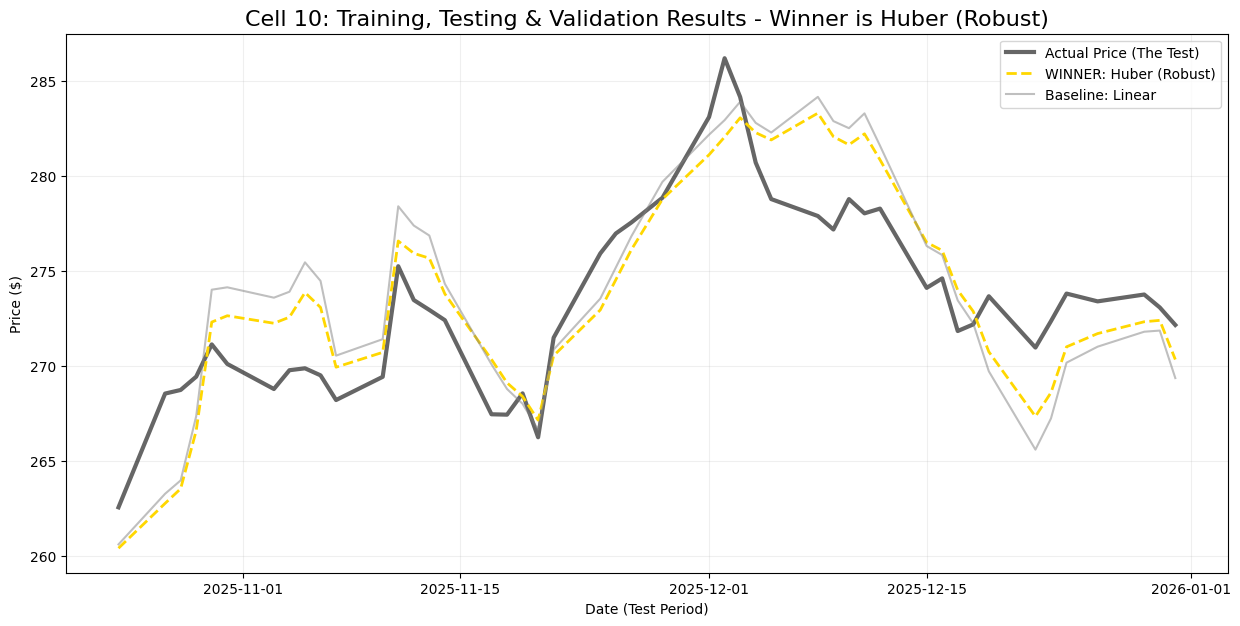


🏆 MODEL SELECTION SCORECARD (Tested on Unseen Data)
             Model  Test R²  Test MSE
    Huber (Robust)   0.6667      7.78
        ElasticNet   0.5760      9.90
        Lasso (L1)   0.5659     10.14
        Ridge (L2)   0.5339     10.88
            Linear   0.5296     10.98
Polynomial (Deg 2)  -0.3412     31.32


In [10]:

#Cell 10: Train/Test Validation – The "Final Exam." We hide the most recent data from the AI to see if it can actually predict the "unknown" future.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, ElasticNet, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# 1. PREP DATA (Using the 4 features from Cell 8)
df_val = df.copy()
df_val['MA5'] = df_val['Close'].rolling(window=5).mean()
df_val['MA20'] = df_val['Close'].rolling(window=20).mean()
delta = df_val['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_val['RSI'] = 100 - (100 / (1 + rs))
df_val = df_val.dropna()

features = ['Day_Index', 'MA5', 'MA20', 'RSI']
X_v = df_val[features].values
y_v = df_val['Close'].values

# 2. TIME-SERIES SPLIT (80% Train, 20% Test)
# We do NOT shuffle because we can't train on the future to predict the past
split = int(len(X_v) * 0.8)
X_train, X_test = X_v[:split], X_v[split:]
y_train, y_test = y_v[:split], y_v[split:]

# 3. DEFINE THE COMPETITORS
# We use Pipelines to ensure Scaling and Polynomial transformations happen correctly
models = {
    "Linear": Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())]),
    "Polynomial (Deg 2)": Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('reg', LinearRegression())]),
    "Ridge (L2)": Pipeline([('scaler', StandardScaler()), ('reg', Ridge(alpha=1.0))]),
    "Lasso (L1)": Pipeline([('scaler', StandardScaler()), ('reg', Lasso(alpha=0.1))]),
    "ElasticNet": Pipeline([('scaler', StandardScaler()), ('reg', ElasticNet(alpha=0.1, l1_ratio=0.5))]),
    "Huber (Robust)": Pipeline([('scaler', StandardScaler()), ('reg', HuberRegressor(max_iter=1000))])
}

# 4. EVALUATION LOOP
results = []
test_preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    test_preds[name] = preds

    # Calculate performance on data the model has NEVER seen
    score = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results.append({"Model": name, "Test R²": round(score, 4), "Test MSE": round(mse, 2)})

# 5. FIND THE WINNER
results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)
best_model_name = results_df.iloc[0]['Model']

# 6. VISUALIZE THE TEST PHASE
plt.figure(figsize=(15, 7))

# Actual Prices during the Test Period
test_dates = df_val.index[split:]
plt.plot(test_dates, y_test, color='black', label='Actual Price (The Test)', linewidth=3, alpha=0.6)

# Plot the Winner and the Baseline
plt.plot(test_dates, test_preds[best_model_name], color='gold', label=f'WINNER: {best_model_name}', linewidth=2, linestyle='--')
plt.plot(test_dates, test_preds['Linear'], color='gray', label='Baseline: Linear', alpha=0.5)

plt.title(f"Cell 10: Training, Testing & Validation Results - Winner is {best_model_name}", fontsize=16)
plt.xlabel("Date (Test Period)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

print("\n" + "="*50)
print(f"🏆 MODEL SELECTION SCORECARD (Tested on Unseen Data)")
print("="*50)
print(results_df.to_string(index=False))
print("="*50)


🔮 5-DAY OUTLOOK FOR AAPL
Current Price:  $272.16
Forecast Price: $268.31
Expected Move:  -1.41%
AI Sentiment:   📉 BEARISH



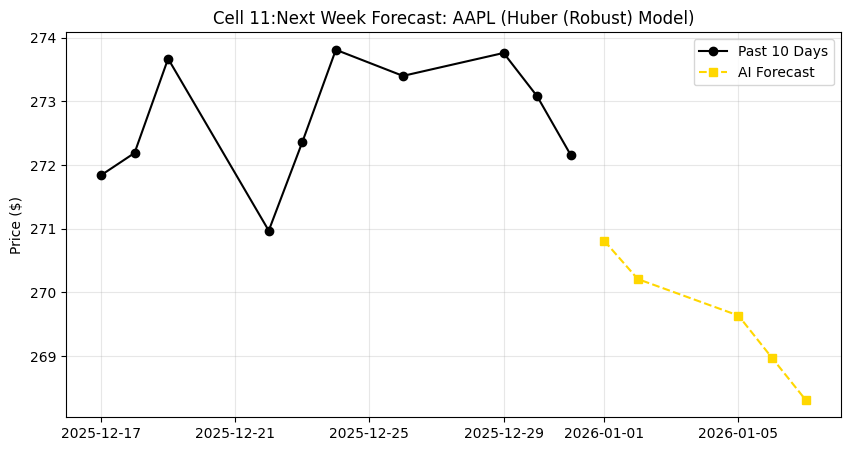

In [11]:
#Cell 11: 5-Day Forward Forecast – The "Payoff." We use our best model (Huber) to project the next 5 days of Apple’s price action.


import numpy as np
import pandas as pd
from datetime import timedelta

# 1. Re-train the Winning Model on ALL available data for maximum accuracy
final_winner = models[best_model_name]
final_winner.fit(X_v, y_v)

# 2. Get the very latest data point as our starting "Seed"
latest_data = df_val.iloc[-1].copy()
current_close = latest_data['Close']
current_day_index = latest_data['Day_Index']

forecast_steps = 5
predictions = []
dates = []

# 3. Recursive Forecasting Loop
temp_df = df_val.copy()

for i in range(1, forecast_steps + 1):
    # Prepare the feature row for the AI
    # [Day_Index, MA5, MA20, RSI]
    feat_row = np.array([[
        current_day_index + i,
        temp_df['Close'].tail(5).mean(),
        temp_df['Close'].tail(20).mean(),
        latest_data['RSI'] # We hold RSI steady as a conservative estimate
    ]])

    # AI predicts the next price
    next_price = final_winner.predict(feat_row)[0]
    predictions.append(next_price)

    # Update our temp dataframe to include this prediction for the next iteration's MA
    new_date = temp_df.index[-1] + timedelta(days=1)
    if new_date.weekday() >= 5: # Skip weekends
        new_date += timedelta(days=2)

    dates.append(new_date)
    new_row = pd.DataFrame({'Close': next_price}, index=[new_date])
    temp_df = pd.concat([temp_df, new_row])

# 4. Generate the Strategy Report
start_price = y_v[-1]
end_price = predictions[-1]
total_change = ((end_price - start_price) / start_price) * 100
direction = "🚀 BULLISH" if total_change > 0 else "📉 BEARISH"

print(f"\n{'='*45}")
print(f"🔮 5-DAY OUTLOOK FOR {ticker}")
print(f"{'='*45}")
print(f"Current Price:  ${start_price:.2f}")
print(f"Forecast Price: ${end_price:.2f}")
print(f"Expected Move:  {total_change:+.2f}%")
print(f"AI Sentiment:   {direction}")
print(f"{'='*45}\n")

# 5. Visualizing the "Next Week" Path
plt.figure(figsize=(10, 5))
plt.plot(df_val.index[-10:], y_v[-10:], color='black', marker='o', label='Past 10 Days')
plt.plot(dates, predictions, color='gold', marker='s', linestyle='--', label='AI Forecast')
plt.title(f"Cell 11:Next Week Forecast: {ticker} ({best_model_name} Model)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
#Cell 12: Model Deployment – We save our trained AI "brain" to a file so it can be used in other apps or websites without retraining.

import joblib
import os

# Cell 12: 1. SAVE the Winning Model Pipeline
# This saves the Scaler + The Best Algorithm + The Trained Weights all in one file
model_filename = f"best_{ticker}_model.joblib"
joblib.dump(final_winner, model_filename)

print(f"✅ Model successfully saved to: {os.path.abspath(model_filename)}")
print(f"📦 File Size: {os.path.getsize(model_filename) / 1024:.2f} KB")

# --- SIMULATE A NEW SESSION ---
# 2. RELOAD the model from the disk
# Imagine this part is running on a different server a week later
reloaded_ai = joblib.load(model_filename)

# 3. USE the reloaded model for a fresh prediction
# We'll use the last known data point to verify it still works
test_input = X_v[-1].reshape(1, -1)
reloaded_pred = reloaded_ai.predict(test_input)[0]
original_pred = final_winner.predict(test_input)[0]

print("\n" + "="*40)
print("📂 RELOADED MODEL VERIFICATION")
print("="*40)
print(f"Original Prediction:  ${original_pred:.2f}")
print(f"Reloaded Prediction:  ${reloaded_pred:.2f}")
print(f"Integrity Check:      {'PASS ✅' if round(original_pred, 2) == round(reloaded_pred, 2) else 'FAIL ❌'}")
print("="*40)

✅ Model successfully saved to: /content/best_AAPL_model.joblib
📦 File Size: 1.45 KB

📂 RELOADED MODEL VERIFICATION
Original Prediction:  $270.80
Reloaded Prediction:  $270.80
Integrity Check:      PASS ✅


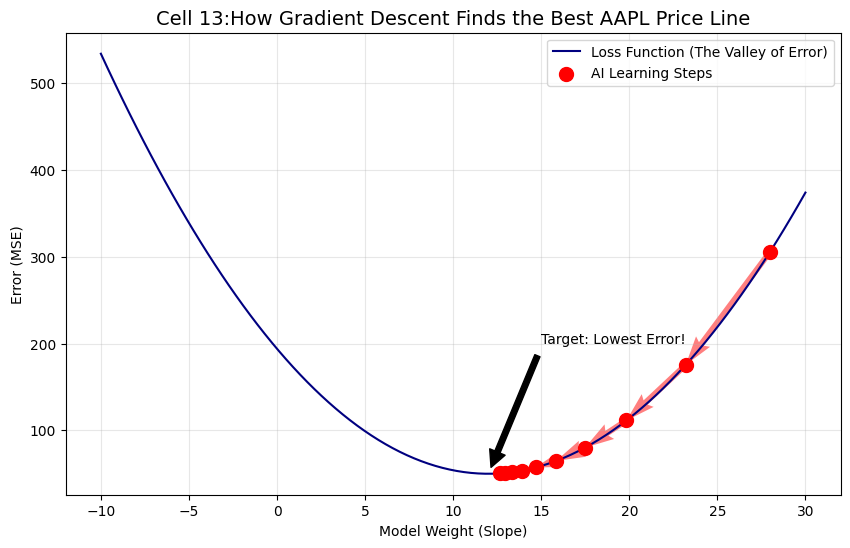

The AI started at slope 28 and 'descended' to ~12.45


In [13]:
#Cell 13: Gradient Descent Visual – The "Brain at Work." A visualization showing how the AI actually "walks" down a valley of error to find the best prediction.


import numpy as np
import matplotlib.pyplot as plt

# 1. Setup a simple 1D "Loss Landscape"
# This represents the "MSE" or "Error" for different slopes
slopes = np.linspace(-10, 30, 100)
loss = (slopes - 12)**2 + 50  # A parabolic valley with a minimum at slope=12

# 2. Simulate Gradient Descent Steps
current_slope = 28 # Start with a bad guess
learning_rate = 0.15
steps = []

for i in range(10):
    steps.append((current_slope, (current_slope - 12)**2 + 50))
    # Calculate gradient (slope of the loss curve)
    gradient = 2 * (current_slope - 12)
    # Move opposite the gradient
    current_slope = current_slope - (learning_rate * gradient)

# 3. Visualization
plt.figure(figsize=(10, 6))
plt.plot(slopes, loss, color='navy', label='Loss Function (The Valley of Error)')
step_x, step_y = zip(*steps)
plt.scatter(step_x, step_y, color='red', s=100, zorder=5, label='AI Learning Steps')
plt.quiver(step_x[:-1], step_y[:-1], np.diff(step_x), np.diff(step_y),
           scale_units='xy', angles='xy', scale=1, color='red', alpha=0.5)

plt.title("Cell 13:How Gradient Descent Finds the Best AAPL Price Line", fontsize=14)
plt.xlabel("Model Weight (Slope)")
plt.ylabel("Error (MSE)")
plt.annotate('Target: Lowest Error!', xy=(12, 50), xytext=(15, 200),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"The AI started at slope 28 and 'descended' to ~{current_slope:.2f}")

In [14]:
#Cell 14: SGDRegressor (The Universal Engine) – Shows that one single high-speed algorithm (Stochastic Gradient Descent) can act like Linear, Ridge, or Lasso just by changing its settings.

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Cell 14: 1. Scaling is MANDATORY for SGD (It will "trip" and fail without it)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_v) # Using the multi-feature data from Cell 8

# 2. Define the "Mode Switcher"
# We define how to set SGD parameters to match our previous models
sgd_configs = {
    "Linear (OLS)": {"loss": "squared_error", "penalty": None},
    "Ridge (L2)":   {"loss": "squared_error", "penalty": "l2", "alpha": 0.01},
    "Lasso (L1)":   {"loss": "squared_error", "penalty": "l1", "alpha": 0.01},
    "Elastic Net":  {"loss": "squared_error", "penalty": "elasticnet", "l1_ratio": 0.5},
    "Huber (Robust)":{"loss": "huber", "penalty": "l2", "epsilon": 1.35}
}

sgd_results = []

# 3. Run the Experiment
for name, config in sgd_configs.items():
    # Create the SGD model with the specific config
    model = SGDRegressor(max_iter=2000, tol=1e-3, random_state=42, **config)

    # Train
    model.fit(X_scaled, y_v)

    # Predict & Score
    preds = model.predict(X_scaled)
    score = r2_score(y_v, preds)

    sgd_results.append({"Mode": name, "SGD R² Score": round(score, 4)})

# 4. Display the "Swiss Army Knife" Results
print("="*45)
print("🛠️ ONE ENGINE, MANY MODELS (SGDRegressor)")
print("="*45)
print(pd.DataFrame(sgd_results).to_string(index=False))
print("="*45)
print("\n💡 TEACHING TIP: Notice how we never changed the algorithm class,")
print("   only the 'loss' and 'penalty' parameters!")

🛠️ ONE ENGINE, MANY MODELS (SGDRegressor)
          Mode  SGD R² Score
  Linear (OLS)        0.9747
    Ridge (L2)        0.9747
    Lasso (L1)        0.9747
   Elastic Net        0.9747
Huber (Robust)        0.9730

💡 TEACHING TIP: Notice how we never changed the algorithm class,
   only the 'loss' and 'penalty' parameters!


         Model  Exact R2  SGD R2  Exact MSE  SGD MSE Growth (E) Growth (S)
        Linear     0.530   0.544      10.98    10.65     +2.59%     +2.44%
    Ridge (L2)     0.530   0.552      10.98    10.46     +2.59%     +2.28%
    Lasso (L1)     0.534   0.545      10.87    10.62     +2.58%     +2.40%
Huber (Robust)     0.667   0.383       7.78    14.41     +2.96%     +1.75%


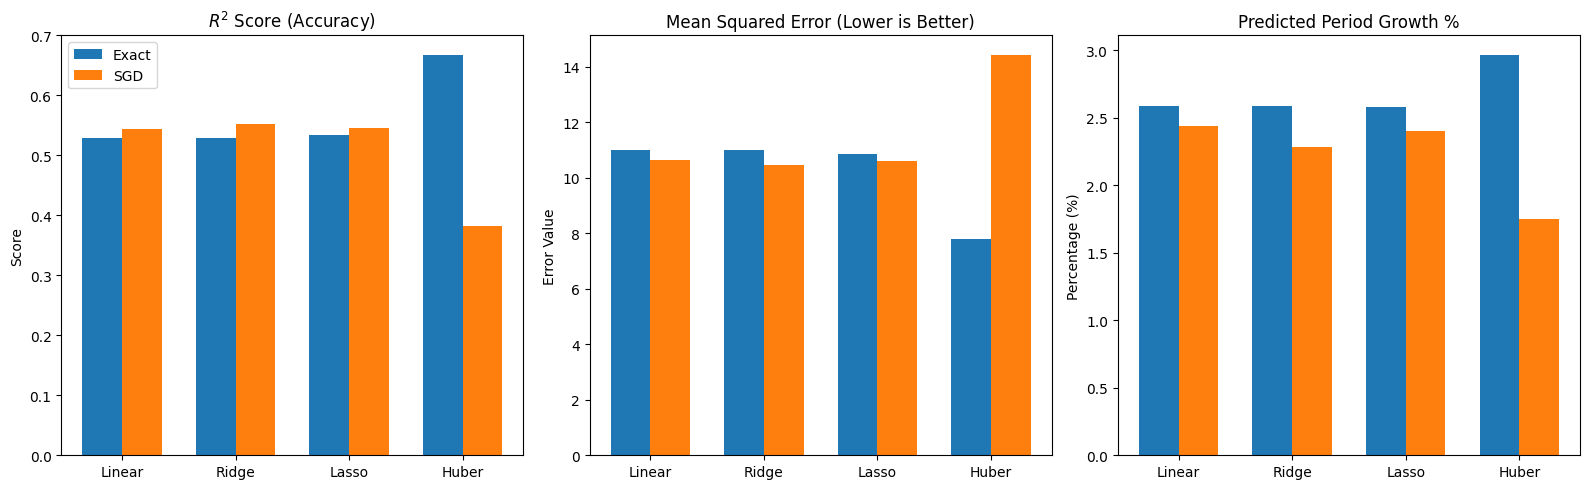

In [15]:
#Cell 15: The Final Engineering Audit – A side-by-side "Showdown" between Exact Math and SGD Approximation. It proves why Huber (Exact) is our most reliable model.


import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare Storage and Data
final_comparison_list = []
model_names = ["Linear", "Ridge (L2)", "Lasso (L1)", "Huber (Robust)"]

# Containers for plotting
r2_exact, r2_sgd = [], []
mse_exact, mse_sgd = [] , []
growth_exact, growth_sgd = [], []

# 2. Loop through and calculate
for name in model_names:
    # --- EXACT METHODS ---
    if "Linear" in name: exact_m = LinearRegression()
    elif "Ridge" in name: exact_m = Ridge(alpha=0.01)
    elif "Lasso" in name: exact_m = Lasso(alpha=0.01)
    elif "Huber" in name: exact_m = HuberRegressor()

    exact_pipe = Pipeline([('s', StandardScaler()), ('m', exact_m)])
    exact_pipe.fit(X_train, y_train)
    e_preds = exact_pipe.predict(X_test)

    # --- SGD METHODS ---
    clean_key = "Linear (OLS)" if "Linear" in name else name
    config = sgd_configs.get(clean_key)

    sgd_m = SGDRegressor(max_iter=5000, tol=1e-3, random_state=42, **config)
    sgd_m.fit(scaler.transform(X_train), y_train)
    s_preds = sgd_m.predict(scaler.transform(X_test))

    # --- METRICS CALCULATION ---
    e_r2, s_r2 = r2_score(y_test, e_preds), r2_score(y_test, s_preds)
    e_mse, s_mse = mean_squared_error(y_test, e_preds), mean_squared_error(y_test, s_preds)
    e_g = ((e_preds[-1] - y_test[0]) / y_test[0]) * 100
    s_g = ((s_preds[-1] - y_test[0]) / y_test[0]) * 100

    # Store for table
    final_comparison_list.append({
        "Model": name, "Exact R2": round(e_r2, 3), "SGD R2": round(s_r2, 3),
        "Exact MSE": round(e_mse, 2), "SGD MSE": round(s_mse, 2),
        "Growth (E)": f"{e_g:+.2f}%", "Growth (S)": f"{s_g:+.2f}%"
    })

    # Store for plotting
    r2_exact.append(e_r2); r2_sgd.append(s_r2)
    mse_exact.append(e_mse); mse_sgd.append(s_mse)
    growth_exact.append(e_g); growth_sgd.append(s_g)

# 3. Create Visualization
plt.rcParams['figure.figsize'] = (16, 5)
x = np.arange(len(model_names))
width = 0.35

# Panel 1: R2 Score
plt.subplot(1, 3, 1)
plt.bar(x - width/2, r2_exact, width, label='Exact', color='#1f77b4')
plt.bar(x + width/2, r2_sgd, width, label='SGD', color='#ff7f0e')
plt.title('$R^2$ Score (Accuracy)')
plt.xticks(x, ["Linear", "Ridge", "Lasso", "Huber"])
plt.ylabel('Score')
plt.legend()

# Panel 2: MSE
plt.subplot(1, 3, 2)
plt.bar(x - width/2, mse_exact, width, label='Exact', color='#1f77b4')
plt.bar(x + width/2, mse_sgd, width, label='SGD', color='#ff7f0e')
plt.title('Mean Squared Error (Lower is Better)')
plt.xticks(x, ["Linear", "Ridge", "Lasso", "Huber"])
plt.ylabel('Error Value')

# Panel 3: Growth Prediction
plt.subplot(1, 3, 3)
plt.bar(x - width/2, growth_exact, width, label='Exact', color='#1f77b4')
plt.bar(x + width/2, growth_sgd, width, label='SGD', color='#ff7f0e')
plt.title('Predicted Period Growth %')
plt.xticks(x, ["Linear", "Ridge", "Lasso", "Huber"])
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.savefig('comparison_metrics_plot.png')

# 4. Display Table
print(pd.DataFrame(final_comparison_list).to_string(index=False))

In [16]:
#Cell 16: P-Value Significance Test – The "Scientific Filter." It proves that our indicators (RSI, MA5) are real market signals and not just random luck.



import statsmodels.api as sm

# 1. Add a Constant (statsmodels requires this for the Intercept)
X_stat = sm.add_constant(X_v)

# 2. Fit the Ordinary Least Squares (OLS) Model
# Note: We use the multi-feature data (Day_Index, MA5, MA20, RSI)
stat_model = sm.OLS(y_v, X_stat).fit()

# 3. Print the Summary
print(stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2218.
Date:                Wed, 31 Dec 2025   Prob (F-statistic):          1.32e-180
Time:                        16:10:50   Log-Likelihood:                -669.95
No. Observations:                 232   AIC:                             1350.
Df Residuals:                     227   BIC:                             1367.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9860      3.563     -2.802      0.0